In [1]:
from kaggle_environments import make
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import sys
import torch
import tqdm
from typing import *

#from lux_ai.lux.game import Game
from lux_ai.lux_gym.lux_env import LuxEnv
from lux_ai.rl_agent.rl_agent import RLAgent

#env = make("lux_ai_2021", configuration={"seed": 56221, "loglevel": 2}, debug=True)
env = make("lux_ai_2021", configuration={"loglevel": 2}, debug=True)

rl_agent = RLAgent(env.steps[0][0]["observation"], env.configuration)

Loading environment football failed: No module named 'gfootball'


In [2]:
env.reset()
env.run(["/home/isaiah/GitHub/Kaggle/Lux_AI_2021/main.py", "/home/isaiah/GitHub/Kaggle/luxai2021_handcrafted_agents/agents/main_coral.py"])

Turn: 1 - Predicted value: -0.03 - Timing info: {Observation processing: 0.02 - Model inference: 0.95 - Collision detection: 0.01} - Remaining overage time: 60.00
Turn: 2 - Predicted value: 0.15 - Timing info: {Observation processing: 0.07 - Model inference: 0.10 - Collision detection: 0.01} - Remaining overage time: 60.00
Turn: 3 - Predicted value: 0.15 - Timing info: {Observation processing: 0.08 - Model inference: 0.15 - Collision detection: 0.01} - Remaining overage time: 60.00
Turn: 4 - Predicted value: 0.16 - Timing info: {Observation processing: 0.07 - Model inference: 0.14 - Collision detection: 0.01} - Remaining overage time: 60.00
Turn: 5 - Predicted value: 0.12 - Timing info: {Observation processing: 0.02 - Model inference: 0.14 - Collision detection: 0.01} - Remaining overage time: 60.00
Turn: 6 - Predicted value: 0.16 - Timing info: {Observation processing: 0.02 - Model inference: 0.14 - Collision detection: 0.01} - Remaining overage time: 60.00
Turn: 7 - Predicted value: 

[[{'action': [],
   'reward': 0,
   'info': {},
   'observation': {'remainingOverageTime': 60,
    'step': 0,
    'width': 16,
    'height': 16,
    'reward': 0,
    'globalUnitIDCount': 2,
    'globalCityIDCount': 2,
    'player': 0,
    'updates': ['0',
     '16 16',
     'rp 0 0',
     'rp 1 0',
     'r coal 0 0 406',
     'r coal 0 15 406',
     'r wood 1 7 351',
     'r wood 1 8 351',
     'r wood 2 5 347',
     'r wood 2 6 346',
     'r wood 2 7 389',
     'r wood 2 8 389',
     'r wood 2 9 346',
     'r wood 2 10 347',
     'r wood 3 5 399',
     'r wood 3 6 302',
     'r wood 3 9 302',
     'r wood 3 10 399',
     'r coal 6 0 414',
     'r coal 6 15 414',
     'r wood 9 7 395',
     'r wood 9 8 395',
     'r wood 10 6 800',
     'r wood 10 7 389',
     'r wood 10 8 389',
     'r wood 10 9 800',
     'r wood 11 0 377',
     'r wood 11 6 800',
     'r wood 11 9 800',
     'r wood 11 15 377',
     'r wood 12 0 354',
     'r wood 12 6 800',
     'r wood 12 9 800',
     'r wood 12 1

In [3]:
env.render(mode="ipython", height=1000, width=1200)

In [14]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from typing import Dict, List

pd.set_option("display.precision", 2)

In [2]:
def agent_failed_on_init(all_commands: List[Dict]) -> bool:
    agent_moved = [False, False]
    for command in [c for cl in all_commands for c in cl]:
        agent_moved[command["agentID"]] = True
        if all(agent_moved):
            return False
    return True

def extract_results_to_dict(
    replay_file: Path,
    points_for_win: float = 1.,
    points_for_loss: float = 0.,
    points_for_tie: float = 0.5,
    verbose: bool = True,
    include_size: bool = True,
) -> dict:
    try:
        with open(replay_file, "r") as f:
            replay = json.load(f)
    except json.JSONDecodeError as e:
        if verbose:
            print(f"JSONDecodeError for file {replay_file}: {e}")
        return {}
    if not include_size:
        replay["width"] = replay["height"] = 0
    
    agent_names = [a["name"] for a in replay["teamDetails"]]
    # Check if the match was a draw
    if replay["results"]["ranks"][0]["rank"] == replay["results"]["ranks"][1]["rank"]:
        agent_points = [points_for_tie, points_for_tie]
    else:
        agent_points = {
            result["agentID"]: points_for_win if result["rank"] == 1 else points_for_loss
            for result in replay["results"]["ranks"]
        }
    
    assert replay["width"] == replay["height"]
    map_size = replay["width"]
    
    if agent_failed_on_init(replay["allCommands"]):
        p1_points = float("nan")
        p2_points = float("nan")
    else:
        p1_points = agent_points[0]
        p2_points = agent_points[1]
    return {
        "map_size": map_size,
        "p1": agent_names[0],
        "p2": agent_names[1],
        "p1_points": p1_points,
        "p2_points": p2_points,
    }

In [28]:
replay_dirs = [
    #"/home/isaiah/lux_ai/RL_main_mrFalse__vs__11-09_21-32-04_59822400_main",
    #"/home/isaiah/lux_ai/RL_main_057854464__vs__11-09_21-32-04_59822400_main",
    #"/home/isaiah/lux_ai/RL_main__vs__10-10_11-18-12_28576448_main",
    "/home/isaiah/lux_ai/RL_main__vs__11-24_12-56-23_062179520_must_research_main__vs__11-09_21-32-04_59822400_main__vs__10-10_11-18-12_28576448_must_research_main"
]


all_result_dfs = {}
for replays_dir in replay_dirs:
    all_results = pd.DataFrame(
        [extract_results_to_dict(file_name, verbose=False, include_size=False)
         for file_name in sorted(Path(replays_dir).glob("*.json"))]
    ).dropna()
    if all_results.shape[0] == 0 or all_results.shape[1] == 0:
        print(f"Skipping {replays_dir}")
        continue
    agent_point_cols = []
    for agent_name in pd.unique(all_results[["p1", "p2"]].values.ravel()):
        apc = f"{agent_name}_points"
        agent_point_cols.append(apc)
        all_results[apc] = all_results["p1_points"].where(all_results["p1"] == agent_name, all_results["p2_points"])

    df_subset = all_results[["map_size", *agent_point_cols]]
    result = df_subset.groupby("map_size", as_index=False).sum()
    aggregate_result = df_subset.drop(["map_size"], axis=1).sum()
    aggregate_result["map_size"] = "ALL"

    result = result.append(aggregate_result, ignore_index=True).set_index("map_size")
    all_result_dfs[replays_dir] = [result]
    
    player_results_df = pd.concat([all_results.groupby("p1").sum()[["p1_points"]],
                                   all_results.groupby("p2").sum()[["p2_points"]]], axis=1).transpose()
    player_results_df = player_results_df.rename(lambda idx: idx.split("_")[0]).rename_axis("player")
    player_results_df = player_results_df.rename(lambda col: f"{col}_points", axis=1)
    player_results_df = player_results_df.reindex(columns=result.columns)
    aggregate_result = player_results_df.sum()
    aggregate_result.name = "ALL"
    
    player_results_df = player_results_df.append(aggregate_result)
    all_result_dfs[replays_dir].append(player_results_df)
    

for replay_dir, dfs in all_result_dfs.items():
    for i, df in enumerate(dfs):
        if i == 0:
            display(df.style.set_caption(Path(replay_dir).stem))
        else:
            display(df)
    print("\n\n")


,RL/main.py_points,HOF/11-24_12-56-23_062179520_must_research/main.py_points,HOF/11-09_21-32-04_59822400/main.py_points,HOF/10-10_11-18-12_28576448_must_research/main.py_points
map_size,,,,
0.0,13.00,13.00,12.00,13.00
ALL,13.00,13.00,12.00,13.00


,RL/main.py_points,HOF/11-24_12-56-23_062179520_must_research/main.py_points,HOF/11-09_21-32-04_59822400/main.py_points,HOF/10-10_11-18-12_28576448_must_research/main.py_points
player,,,,
p1,6.0,6.0,0.0,NaN
p2,3.0,3.0,5.0,2.0
ALL,9.0,9.0,5.0,2.0


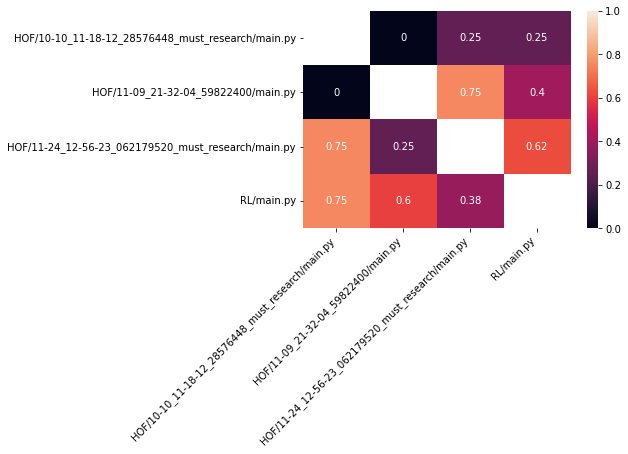

In [29]:
replays_dir = replay_dirs[-1]
results = pd.DataFrame(
    [extract_results_to_dict(file_name, verbose=False, include_size=False)
     for file_name in sorted(Path(replays_dir).glob("*.json"))]
).dropna()

all_players = np.unique(results[["p1", "p2"]].to_numpy())
results_dict = {
    player: {p: [0., 0.] for p in all_players}
    for player in all_players
}
for i, row in results.iterrows():
    for fp, sp in [("p1", "p2"), ("p2", "p1")]:
        points = row[f"{fp}_points"]
        matchup = results_dict[row[sp]][row[fp]]
        matchup[0] += points
        matchup[1] += 1

scores_dict = {
    outer_key: {key: val[0] / max(val[1], 1) for key, val in outer_val.items()}
    for outer_key, outer_val in results_dict.items()
}

sns.heatmap(pd.DataFrame(scores_dict), annot=True, vmin=0., vmax=1., mask=np.eye(len(scores_dict)))
plt.xticks(rotation=45, ha="right")
plt.show()

In [27]:
pd.DataFrame(results_dict)

,HOF/10-10_11-18-12_28576448_must_research/main.py,HOF/11-09_21-32-04_59822400/main.py,HOF/11-24_12-56-23_062179520_must_research/main.py,RL/main.py
HOF/10-10_11-18-12_28576448_must_research/main.py,"[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[1.0, 3.0]"
HOF/11-09_21-32-04_59822400/main.py,"[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[1.0, 3.0]"
HOF/11-24_12-56-23_062179520_must_research/main.py,"[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[3.0, 4.0]"
RL/main.py,"[2.0, 3.0]","[2.0, 3.0]","[1.0, 4.0]","[0.0, 0.0]"


In [20]:
replay_dir = "/home/isaiah/lux_ai/RL_main__vs__10-10_11-18-12_28576448_must_research_main"

i = 0
for replay_file in Path(replay_dir).rglob("*.json"):
    with open(replay_file, "r") as f:
        replay_text = "|".join(f.readlines())
    # Find any replays with carts
    if "bc " in replay_text:
        print(f"{i}: {replay_file}")
        i += 1

0: /home/isaiah/lux_ai/RL_main__vs__10-10_11-18-12_28576448_must_research_main/06_12.json
1: /home/isaiah/lux_ai/RL_main__vs__10-10_11-18-12_28576448_must_research_main/03_24.json
2: /home/isaiah/lux_ai/RL_main__vs__10-10_11-18-12_28576448_must_research_main/07_16.json
3: /home/isaiah/lux_ai/RL_main__vs__10-10_11-18-12_28576448_must_research_main/08_16.json
4: /home/isaiah/lux_ai/RL_main__vs__10-10_11-18-12_28576448_must_research_main/09_16.json
